In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("resnet34_3d_seg-round-2.csv")
df

,epoch,lr,loss_train,loss_val,fbeta_0.20,fbeta_0.25,fbeta_0.30,fbeta_0.35,fbeta_0.40,fbeta_0.45,...,fbeta_0.55,fbeta_0.60,fbeta_0.65,fbeta_0.70,fbeta_0.75,fbeta_0.80,fbeta_0.85,fbeta_0.90,fbeta_0.95,accuracy
0,1,4.000000e-06,0.759260,0.740919,0.102303,0.103017,0.105054,0.108109,0.112186,0.116686,...,0.136108,0.141162,0.118491,0.042645,0.007112,0.000000,0.000000,0.000000,0.000000,0.326179
1,2,6.894754e-06,0.710465,0.748904,0.105493,0.108432,0.111860,0.115583,0.119239,0.123540,...,0.124996,0.110118,0.079789,0.028353,0.003880,0.000002,0.000000,0.000000,0.000000,0.452451
2,3,1.522987e-05,0.674071,0.710306,0.105714,0.111536,0.118290,0.124874,0.133849,0.146044,...,0.165948,0.165309,0.150376,0.115573,0.052093,0.012987,0.000035,0.000000,0.000000,0.591914
3,4,2.800000e-05,0.642451,1.081572,0.114521,0.118942,0.122359,0.125953,0.131019,0.138679,...,0.152348,0.156680,0.155774,0.149740,0.133954,0.103305,0.060431,0.018022,0.001817,0.489197
4,5,4.366489e-05,0.632328,0.577171,0.134907,0.148831,0.166129,0.186079,0.201012,0.214533,...,0.231644,0.231272,0.214627,0.171799,0.119318,0.070088,0.037663,0.019997,0.000817,0.831877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,4.869946e-07,0.333658,0.361022,0.510785,0.529278,0.543483,0.554994,0.565575,0.575574,...,0.595037,0.604252,0.614031,0.625805,0.638364,0.649368,0.658592,0.657350,0.626936,0.934034
96,97,2.743041e-07,0.340582,0.368344,0.472569,0.488647,0.501629,0.512064,0.521233,0.530363,...,0.550352,0.561711,0.572800,0.584180,0.597898,0.613547,0.632478,0.650167,0.648309,0.924412
97,98,1.221970e-07,0.333171,0.362043,0.506717,0.524777,0.538861,0.550850,0.561732,0.571368,...,0.589596,0.598591,0.608621,0.619800,0.632422,0.644349,0.655537,0.658126,0.632444,0.933125
98,99,3.085853e-08,0.332193,0.362878,0.494331,0.511223,0.524836,0.536514,0.547266,0.557584,...,0.576591,0.586004,0.595848,0.606338,0.619084,0.634556,0.648011,0.660794,0.639588,0.930437


(0.3, 0.6)

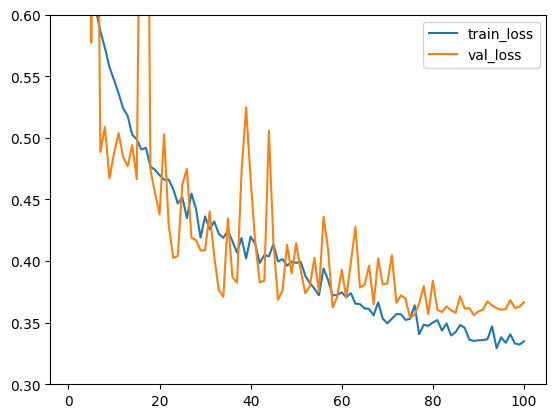

In [8]:
plt.plot(df["epoch"], df["loss_train"], label="train_loss")
plt.plot(df["epoch"], df["loss_val"], label="val_loss")
# plot the moving average of the validation loss
# plt.plot(df["epoch"], df["loss_train"].rolling(2).mean(), label="val_loss")

plt.legend()
plt.ylim(0.3, 0.6)

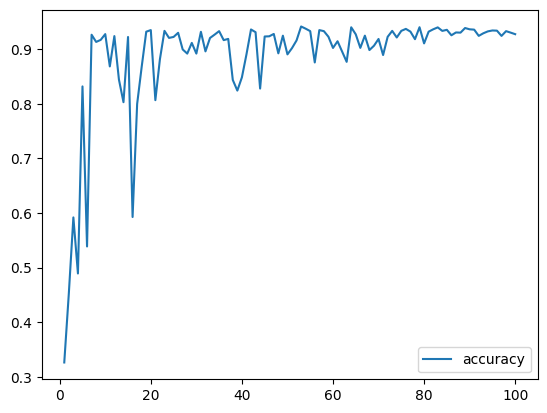

In [9]:
plt.plot(df["epoch"], df["accuracy"], label="accuracy")

plt.legend()
# plt.ylim(0.3, 0.6)

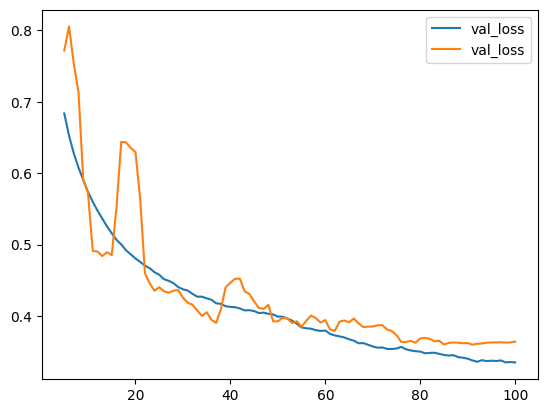

In [10]:
plt.plot(df["epoch"], df["loss_train"].rolling(5).mean(), label="val_loss")
plt.plot(df["epoch"], df["loss_val"].rolling(5).mean(), label="val_loss")

plt.legend()
# plt.ylim(0.05, 0.3)

(100, 16)


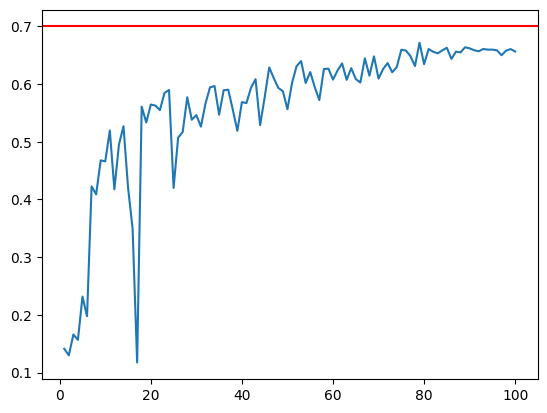

In [11]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
print(df_fbeta.shape)
df_fbeta = np.max(df_fbeta, axis=1)
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")

# put horizontal line at 0.55
plt.axhline(y=0.7, color='r', linestyle='-')


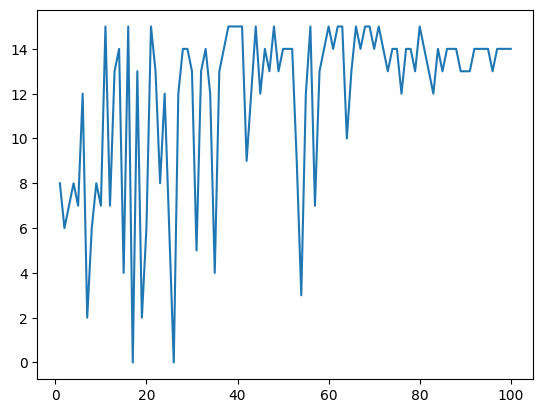

In [12]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
df_fbeta = np.argmax(df_fbeta, axis=1)
df_fbeta.shape
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")